캐글에서 진행되고 있는 경진대회 목록을 보여주는 명령어

In [95]:
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/nfl-player-contact-detection                  2023-03-01 23:59:00  Featured          $100,000        550           False  
https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting     2023-03-14 23:59:00  Featured           $60,000       1752           False  
https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations  2023-03-14 23:59:00  Featured           $55,000        525           False  
https://www.kaggle.com/competitions/rsna-breast-cancer-detection                  2023-02-27 23:59:00  Featured           $50,000       1201           False  
https://www.kaggle.com/competitions/icecube-ne

다운받을 수 있는 데이터들의 리스트

In [96]:
!kaggle datasets list

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                        480KB  2023-01-04 12:50:31           4753        173  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                  1MB  2023-01-14 17:03:12           1301         38  0.88235295       
johnny1994/divorce-rates-data-should-you-get-married            Divorce Rates Data: Should You Get Married?        22KB  2023-01-15 12:49:06            786         31  0.88235295       
rakkesharv/spotify-top-10000-streamed-songs                     Spotif

유튜브 인기영상 다운로드 - YouTube Trending Video Dataset (updated daily)

In [97]:
!kaggle datasets download -d rsrishav/youtube-trending-video-dataset

youtube-trending-video-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


파일을 압축 해제하기

In [98]:
import zipfile

fantasy_zip = zipfile.ZipFile('./youtube-trending-video-dataset.zip')
fantasy_zip.extractall('./youtube-trending-video-dataset/')
 
fantasy_zip.close()

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import timedelta

data = pd.read_csv('./youtube-trending-video-dataset/KR_youtube_trending_data.csv')
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [100]:
df = data[:]

category_id와 json 파일을 사용하여 텍스트로 된 category 열을 생성합니다.

In [101]:
id_to_category = {}

with open("./youtube-trending-video-dataset/KR_category_id.json","r") as f:
    id_data = json.load(f)
    for category in id_data["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]

# id_to_category

df["categoryId"] = df["categoryId"].astype(str)
df.insert(4, "category", df["categoryId"].map(id_to_category))

categoryId가 29번인 영상을 직접 찾아 확인해보니 카테고리가 "비영리/사회운동"이네요.  
category의 결측치를 "Nonprofits & Activism" 으로 채워줍니다.

In [102]:
df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"

C:\Users\bigdata\AppData\Local\Temp\ipykernel_42708\2824784033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"].loc[df["category"].isnull() == True] = "Nonprofits & Activism"


In [103]:
df["trending_date"] = df["trending_date"].str[0:10]
df["publishedAt"] = df["publishedAt"].str[0:19]
df["trending_date"] = pd.to_datetime(df["trending_date"])
df["publishedAt"] = pd.to_datetime(df["publishedAt"])

In [104]:
df["tag_count"] = df["tags"].apply(lambda x : len(x.split("|")) if x != "[none]" else 0)

In [105]:
df["likes/view_count"] = df["likes"] / df["view_count"]
df["dislikes/view_count"] = df["dislikes"] / df["view_count"]
df["comment_count/view_count"] = df["comment_count"] / df["view_count"]
df["dislikes/likes"] = df["dislikes"] / df["likes"]
df["dislikes/likes"].loc[df["dislikes/likes"] == np.inf] = 0

C:\Users\bigdata\AppData\Local\Temp\ipykernel_42708\3961959139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dislikes/likes"].loc[df["dislikes/likes"] == np.inf] = 0


In [106]:
df.isnull().sum()

video_id                       0
title                          0
publishedAt                    0
channelId                      0
category                       0
channelTitle                   0
categoryId                     0
trending_date                  0
tags                           0
view_count                     0
likes                          0
dislikes                       0
comment_count                  0
thumbnail_link                 0
comments_disabled              0
ratings_disabled               0
description                 3961
tag_count                      0
likes/view_count               7
dislikes/view_count            7
comment_count/view_count       7
dislikes/likes              2724
dtype: int64

결측값을 0으로 대체합니다.

In [107]:
df["dislikes/likes"].loc[df["dislikes/likes"].isnull() == True] = 0

C:\Users\bigdata\AppData\Local\Temp\ipykernel_42708\1258835548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dislikes/likes"].loc[df["dislikes/likes"].isnull() == True] = 0


title의 길이로 title_lenght 열을 생성했습니다.

In [108]:
df["title_length"] = df["title"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )

treTime-pubTime  
동영상 게시 후 얼마 후에 인기동영상에 갔는지를 의미하는 treTime-pubTime입니다.


In [109]:
df["treTime-pubTime"] = df["trending_date"] - df["publishedAt"] + timedelta(days = 1)

특정 날짜에 인기키워드를 알기위해 날짜를 지정합니다.

In [110]:
df = df[df["trending_date"]== "2023-01-24" ]

인기영상에 제목과 조회수만 분리해서 df2에 저장합니다.

In [111]:
df2 = df[['title','view_count']]

조회수 기준으로 정렬하고 중복된 title을 제거합니다.

In [112]:
df_sorted = df2.sort_values(by="view_count", ascending=False).drop_duplicates(['title'], keep="first") 

df_sorted를 df_hot에 카피

In [113]:
df_hot = df_sorted.copy()

인기영상 제목에 한글만 추출

In [114]:
import re
df_hot['title_refined'] = df_hot['title'].apply(lambda x: re.sub('[^가-힣\s]', '', x)) 

In [115]:
df_hot = df_hot[df_hot['title_refined'].apply(lambda x: re.sub('[^가-힣]', '', x)) != ''] # 한글만 남기고 제거, 빈칸 제거

In [116]:
!pip install soynlp

In [117]:
#word extractor는 어떤 단어가 얼마나 자주 등장하는지, 얼마나 자주 등장하는 단어와 함께 등장하는지, 등을 계산하여 단어의 특성을 추출해주는 라이브러리
from soynlp.word import WordExtractor 

word_extractor = WordExtractor(min_frequency=10,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)
word_extractor.train(df_hot['title_refined'].values) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.372 Gb
all cohesion probabilities was computed. # words = 5
all branching entropies was computed # words = 303
all accessor variety was computed # words = 303


###3. LTokenizer로 L-R 분리

In [118]:
# LTokenizer는 단어의 특성을 이용하여 토큰화를 수행하는 라이브러리
from soynlp.tokenizer import LTokenizer 

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

###4. 제목 데이터 중 L만 남기기

In [119]:
df_hot['tokenized'] = df_hot['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) 

# 인기 영상 키워드 분석하기 - 단어 빈도 수 구하기

###1. 인기 영상 (50만 조회수 이상)

In [120]:
df_hot_top = df_hot[df_sorted['view_count'] > 500000]

C:\Users\bigdata\AppData\Local\Temp\ipykernel_42708\2271605465.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hot_top = df_hot[df_sorted['view_count'] > 500000]


###2. tokenized 단어 한 배열에 담기

In [121]:
words = []
for i in df_hot_top['tokenized'].values:
  for k in i:
    words.append(k)

### Counter로 words 빈도 수 파악하기

In [122]:
from collections import Counter
count = Counter(words)
words_dict = dict(count)

# 인기 영상 키워드 분석하기 - 워드 클라우드 그리기

### wordcloud 폰트 설정 및 생성하기

In [123]:
!pip install wordcloud

In [124]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='C:/Windows/Fonts/H2GPRM.ttf', background_color='white', width=500, height=500).generate_from_frequencies(words_dict)

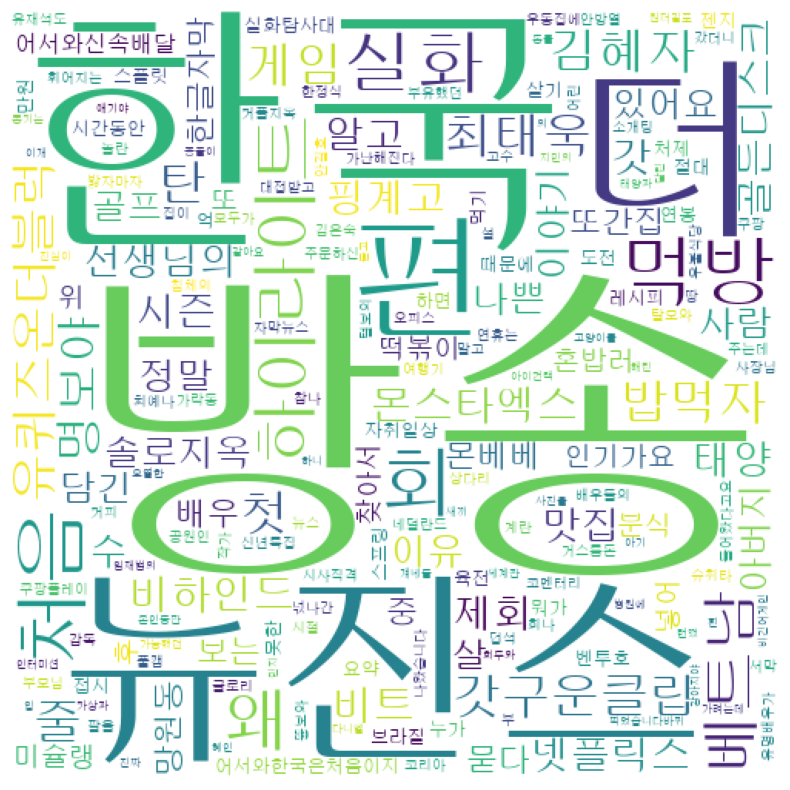

In [125]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### StopWord 설정 후 다시 보기

In [126]:
import pandas as pd

stopwords = pd.read_csv('./한국어 불용어.txt', header=None)
stop_words = set(stopwords[0])

In [136]:
for i in stop_words:  
  if i in words_dict:  # 불용어가 단어 사전에 있으면
    del words_dict[i]  # 불용어 제거 


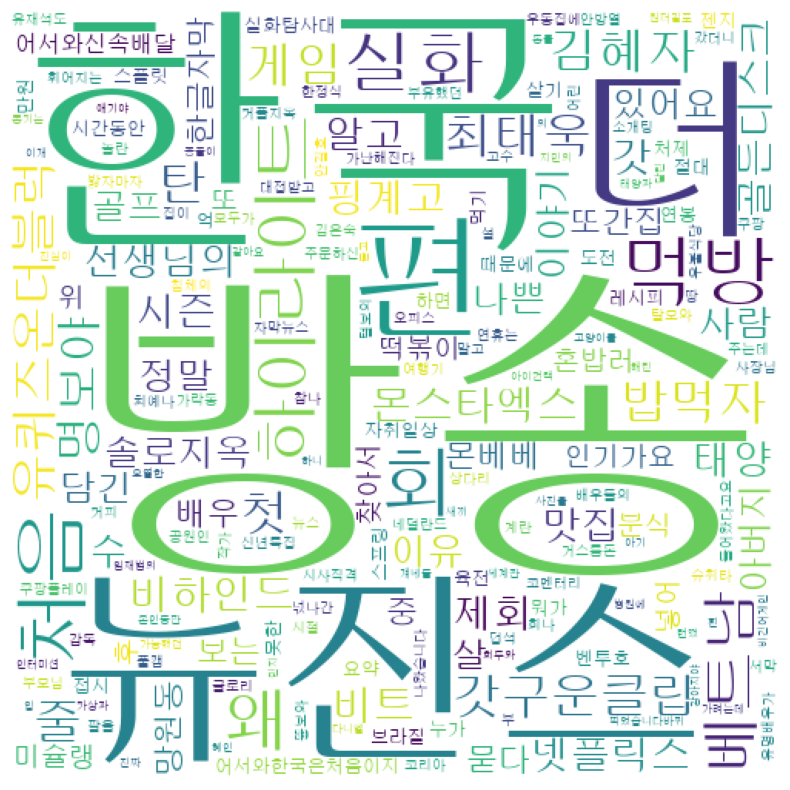

In [137]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


이미지파일 출력

In [ ]:
#이미지 저장
wordcloud.to_file('./youtube_wordcloud.png')

csv로 출력합니다

In [ ]:
df_hot_top.to_excel("./KR_youtube_trending.xlsx", index=False, header=True, encoding="utf-8") 
df.to_csv("./KR_youtube_trending_all.csv" , index = False, encoding = "utf-8")